In [ ]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight 
from keras.layers import Input , Conv2D , BatchNormalization , MaxPooling2D , Dropout , Flatten , Dense , GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications import ResNet50
import tensorflow as tf

#uploading data

In [ ]:
!cp -r "/content/drive/MyDrive/ML/brain tumor" /content

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     zoom_range=0.05,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     brightness_range = [0.5, 1.4],
                                     validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory="brain tumor",
                                                    batch_size=10,
                                                    target_size=(224, 224),
                                                    shuffle = True,
                                                    subset = "training")

validation_generator = train_datagen.flow_from_directory(directory="brain tumor",
                                                            batch_size=10,
                                                            target_size=(224, 224),
                                                            shuffle = False,
                                                            subset = "validation")

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


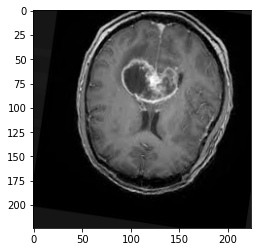

[0. 1.]


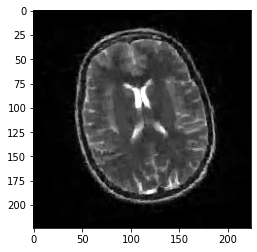

[1. 0.]


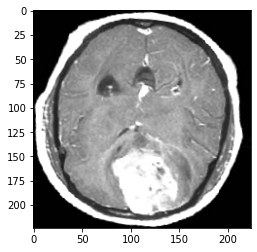

[0. 1.]


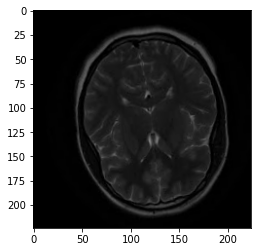

[1. 0.]


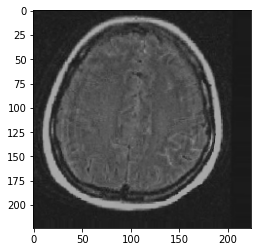

[0. 1.]


In [ ]:
for my_batch in train_generator :
  images = my_batch[0]
  labels = my_batch[1]
  for i in range(5):
    plt.imshow(images[i])
    plt.show()
    print(labels[i])
  break

In [ ]:
len(train_generator[0][1])

2

In [ ]:
len(labels)

10

In [ ]:
for i in range(len(train_generator)) :
  a=0
  for j in range(len(train_generator[i])):
    a=(np.argmax(train_generator[i][1][j]))
    train_generator[i][1][j]=a

In [ ]:
train_generator[0][1][1]

array([1., 0.], dtype=float32)

In [ ]:
np.argmax(train_generator[0][1][1])

0

In [ ]:
a=(np.argmax(train_generator[0][1][1]))

In [ ]:
a

0

In [ ]:
train_generator[0][1][1]

array([1., 0.], dtype=float32)

In [ ]:
labels=a

In [ ]:
labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

#model 1

In [ ]:
model1 = Sequential([ 
      Conv2D(filters = 64 , kernel_size = (3,3), activation="relu", input_shape=(224,224,3)),
      MaxPooling2D(pool_size = (3,3)),
      Conv2D(filters = 32 , kernel_size = (3,3), activation="relu",),
      MaxPooling2D(pool_size = (3,3)),
      Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      MaxPooling2D(pool_size = (3,3)),
      Flatten(),
      Dense(units = 512 , activation="relu"),
      Dropout(rate = 0.5),
      Dense(units = 2 , activation="softmax")
  ])

In [ ]:
model1.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
history1 = model1.fit(train_generator,epochs = 20, validation_data = validation_generator )

Epoch 1/20
21/21 [==============================] - 21s 947ms/step - loss: 0.6589 - accuracy: 0.6355 - val_loss: 0.5927 - val_accuracy: 0.6400
Epoch 2/20
21/21 [==============================] - 23s 1s/step - loss: 0.6045 - accuracy: 0.6601 - val_loss: 0.5662 - val_accuracy: 0.7200
Epoch 3/20
21/21 [==============================] - 19s 889ms/step - loss: 0.5820 - accuracy: 0.7586 - val_loss: 0.5490 - val_accuracy: 0.7000
Epoch 4/20
21/21 [==============================] - 18s 861ms/step - loss: 0.5575 - accuracy: 0.7192 - val_loss: 0.5259 - val_accuracy: 0.7400
Epoch 5/20
21/21 [==============================] - 19s 859ms/step - loss: 0.5416 - accuracy: 0.7734 - val_loss: 0.5493 - val_accuracy: 0.7200
Epoch 6/20
21/21 [==============================] - 18s 874ms/step - loss: 0.5171 - accuracy: 0.7882 - val_loss: 0.5234 - val_accuracy: 0.7400
Epoch 7/20
21/21 [==============================] - 20s 935ms/step - loss: 0.5209 - accuracy: 0.7833 - val_loss: 0.4988 - val_accuracy: 0.7400
Ep

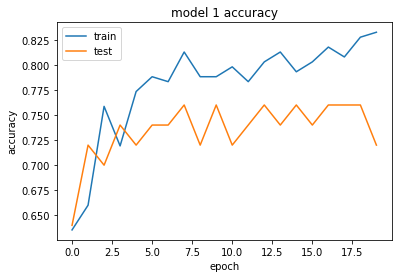

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

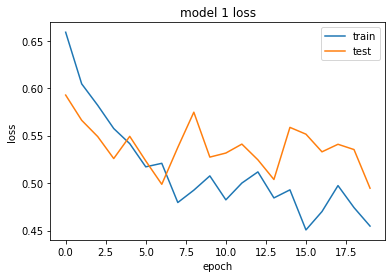

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#model 2

In [ ]:
base_model = MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model2 = tf.keras.Sequential([
                              base_model,
                              GlobalAveragePooling2D(),
                              Dense(512, activation = 'relu'),
                              Dropout(rate = 0.2),
                              Dense(2, activation='softmax')
                            ])

model2.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
history2 = model2.fit(train_generator,epochs = 20, validation_data = validation_generator)

Epoch 1/20
21/21 [==============================] - 15s 558ms/step - loss: 0.7376 - accuracy: 0.5862 - val_loss: 0.4028 - val_accuracy: 0.8000
Epoch 2/20
21/21 [==============================] - 11s 497ms/step - loss: 0.5198 - accuracy: 0.7340 - val_loss: 0.3061 - val_accuracy: 0.9200
Epoch 3/20
21/21 [==============================] - 12s 550ms/step - loss: 0.4409 - accuracy: 0.7980 - val_loss: 0.2677 - val_accuracy: 0.9200
Epoch 4/20
21/21 [==============================] - 11s 510ms/step - loss: 0.3753 - accuracy: 0.8522 - val_loss: 0.2205 - val_accuracy: 0.9400
Epoch 5/20
21/21 [==============================] - 11s 498ms/step - loss: 0.3368 - accuracy: 0.8719 - val_loss: 0.2150 - val_accuracy: 0.9000
Epoch 6/20
21/21 [==============================] - 11s 502ms/step - loss: 0.2947 - accuracy: 0.8966 - val_loss: 0.1921 - val_accuracy: 0.9200
Epoch 7/20
21/21 [==============================] - 11s 504ms/step - loss: 0.2961 - accuracy: 0.8966 - val_loss: 0.1725 - val_accuracy: 0.9800

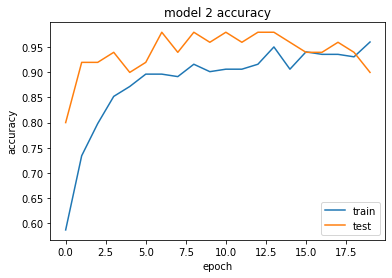

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

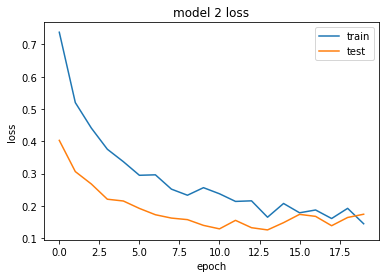

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
base_model = MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model2 = tf.keras.Sequential([
                              base_model,
                              GlobalAveragePooling2D(),
                              Dense(512, activation = 'relu'),
                              Dense(64,activation = 'relu')
                              Dropout(rate = 0.2),
                              Dense(2, activation='softmax')
                            ])

model2.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

#model 3

In [ ]:
model_3 = tf.keras.models.Sequential()
model_3.add(res_model)
model_3.add(Flatten())
model_3.add(BatchNormalization())
model_3.add(Dense(32,activation="relu"))
model_3.add(Dense(2, activation= "softmax"))

In [ ]:
model_3.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 10e-6),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
history3 = model_3.fit(train_generator,epochs = 20, validation_data = validation_generator)

Epoch 1/20
21/21 [==============================] - 44s 2s/step - loss: 0.7351 - accuracy: 0.4975 - val_loss: 0.9248 - val_accuracy: 0.3800
Epoch 2/20
21/21 [==============================] - 39s 2s/step - loss: 0.6514 - accuracy: 0.6059 - val_loss: 0.7579 - val_accuracy: 0.4000
Epoch 3/20
21/21 [==============================] - 39s 2s/step - loss: 0.5812 - accuracy: 0.6995 - val_loss: 0.6372 - val_accuracy: 0.6200
Epoch 4/20
21/21 [==============================] - 41s 2s/step - loss: 0.5649 - accuracy: 0.7537 - val_loss: 0.5954 - val_accuracy: 0.6800
Epoch 5/20
21/21 [==============================] - 39s 2s/step - loss: 0.5123 - accuracy: 0.8079 - val_loss: 0.5699 - val_accuracy: 0.6800
Epoch 6/20
21/21 [==============================] - 38s 2s/step - loss: 0.5259 - accuracy: 0.7685 - val_loss: 0.5736 - val_accuracy: 0.6600
Epoch 7/20
21/21 [==============================] - 38s 2s/step - loss: 0.5413 - accuracy: 0.7389 - val_loss: 0.5468 - val_accuracy: 0.6800
Epoch 8/20
21/21 [==

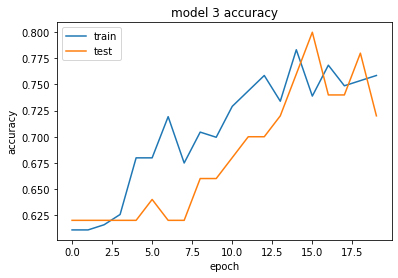

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

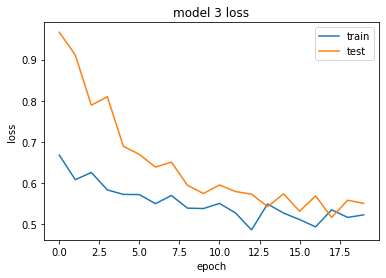

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()